Import libraries and set global configurations


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# suppress warnings from libraries for cleaner looking outputs
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15}) #Setting font size for the plots
pd.set_option('display.max_rows', 500) #Settting display options
pd.set_option('display.max_columns', 500)

Load data

In [2]:
data = pd.read_csv('train.csv')

_____________________________________________________________________________________________________

# Data Understanding, Preparation and EDA

Let's look at the data to understand what are the columns available in the dataset.

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(f"Shape of the data: {data.shape}")

Shape of the data: (1460, 81)


There are 81 columns and 1460 entries in the provided dataset. 

From data.head(), we could observe null values in some of the columns. Let us check the percentage of null values in each column of the dataset.

## Null Value Check

In [5]:
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

### Categorical data columns with Nan

From the "Data Definition", for categorical variables, we could see that null value still indicates an absence of a category and not necessarily mean the data is missing. Incidentally, the variables with high number of null values are categorical variables.

To remove the null values in these categorical variables, let us impute every null value of categorical columns in the dataset with a category named "None". First, let us list the variables that have null values in it.

In [6]:
vars_with_Nan = data.isnull().sum()
vars_with_Nan = list(vars_with_Nan[vars_with_Nan>0].index)
print("Variables with Null Values:\n", vars_with_Nan)

Variables with Null Values:
 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Based on the Data Definition for the dataset variables, manually filtering the categorical variables with NA as a category. Also, setting the null values in it as string 'None'.

In [7]:
categorical_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in categorical_cols:
    data[col].fillna('None', inplace=True)

Let us look at the data again to see if the Nan values are replaced.

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### Numerical data columns with Nan

In [9]:
null_data = ((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)
null_data[null_data>0]

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

We could observe that are few numerical columns which have null values. Let us handle each of these columns.

#### LotFrontage

This column defines the "linear feet of street connected to property". This could be imputed in several ways. One such way is to get a median value among the properties in the same Neighborhood and apply that for null values. Let us implement that.

In [10]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### GarageYrBlt

This column denotes the year in which the garage of the property is built. For cases where we do not have this data, we can use the property's original construction year.

In [11]:
data['GarageYrBlt'][data['GarageYrBlt'].isna()] = (data['YearBuilt']).astype('int')

#### MasVnrArea

This column shows the Masonry veneer area in square feet. We could impute missing values with zeros as the absence of this value could mean there is no masonry veneer area.

In [12]:
data['MasVnrArea'][data['MasVnrArea'].isna()] = 0.0

#### Electrical

This column shows the type of electrical system used in the property. The missing values could be imputed with the highest occuring value in the data.

In [13]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We could see "SBrkr" is the most common type of electrical system. Let us use this value to fill the null values.

In [14]:
data['Electrical'][data['Electrical'].isna()] = "SBrkr"

## Check for duplicates

Now, let us check for any duplicate entries in the dataset. Before checking this, let us remove the "Id" column from the data, so that it will not impact the "duplicate" entry check. Not just that, the "Id" column is unnecessary for our data analysis.

In [15]:
data.drop(['Id'],axis=1,inplace=True)

In [16]:
print("Number of duplicate rows: ", sum(data.duplicated()))

Number of duplicate rows:  0


There are no duplicated rows in the dataset.

## Datatype Check

Now, let us manually check every column in the dataset and see if each column has the right dataset set.

Let us analyse the Dtype information of each column and also check the data distribution of numerical variables.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We could see that there are few categorical variables such as "OverallCond" are assumed as numerical datatypes such as int64. Modifying these columns as categorical variables.

In [19]:
categorical_cols = ['OverallCond','OverallQual', 'MSSubClass']
for col in categorical_cols:
    data[col] = data[col].astype("object")

Also, it could be seen that columns denoting year or month are assumed as int64 too. These are considered as continuous variables.

#### Derived data
For the purpose of our analysis, we could derive how old the building is, based on the year built and year sold. Similarly, we could do the same for other time based variables. 

In [20]:
time_based_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

# Adding the Age of the building at the time of sale
data['Age'] = (data['YrSold'] - data['YearBuilt']).astype('int64')

# Adding the age of the building after remodeling at the time of sale
data['RemodAge'] = (data['YrSold'] - data['YearRemodAdd']).astype('int64')

# Adding the age of the Garage at the time of sale
data['GarageAge'] = (data['YrSold'] - data['GarageYrBlt'])

We could now remove the Year data from the dataset as we have introduced new columns.

In [21]:
data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1,inplace=True)

We have not removed "MoSold" data because this data could provide insights if there are any, such as which month of the year does a house get sold given a set of characteristics. Let us convert this column to a categorical column as currently this is assumed as a numerical variable with dtype int64.

In [22]:
data['MoSold'] = data['MoSold'].astype("object")

Let us check the data info again.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  RoofStyl

## Exploratory Data Analysis

Let us first check the distribution of Sale prices of the houses in the dataset.

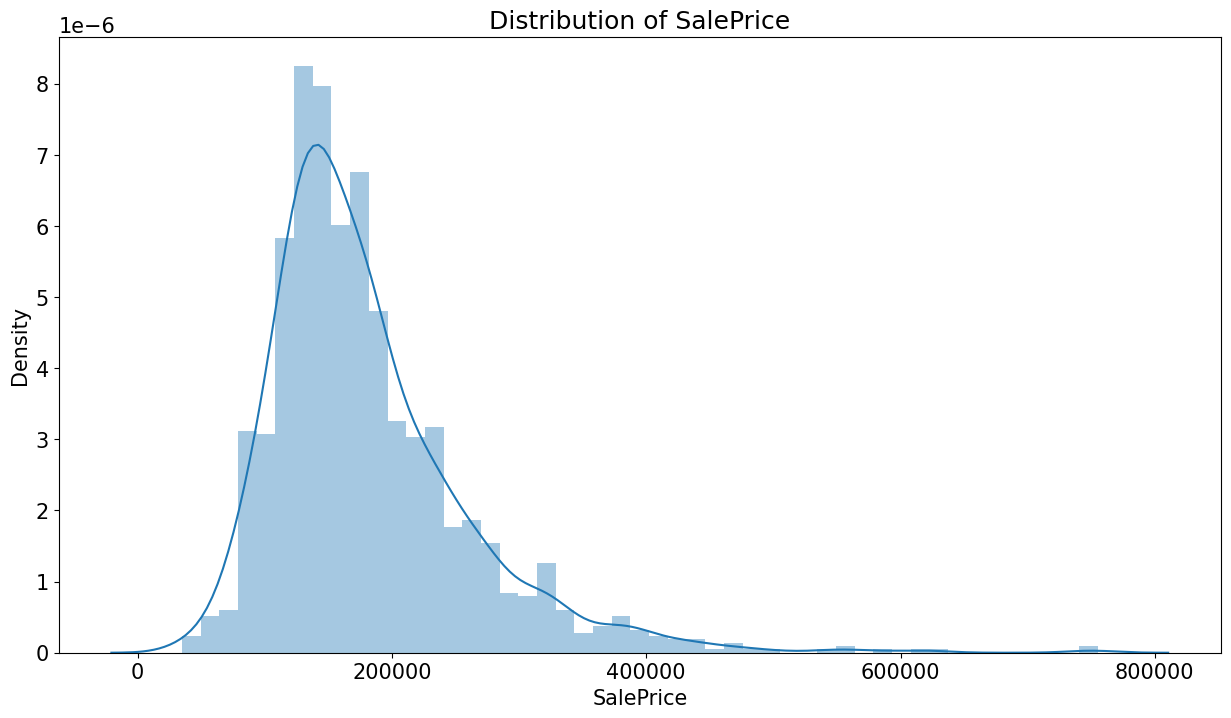

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(data['SalePrice'])
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

The SalePrice distribution is skewed to the right. There are very few properties that were sold above 400,000 dollars.

Let us now check the correlation betwen the different variables in the dataset.

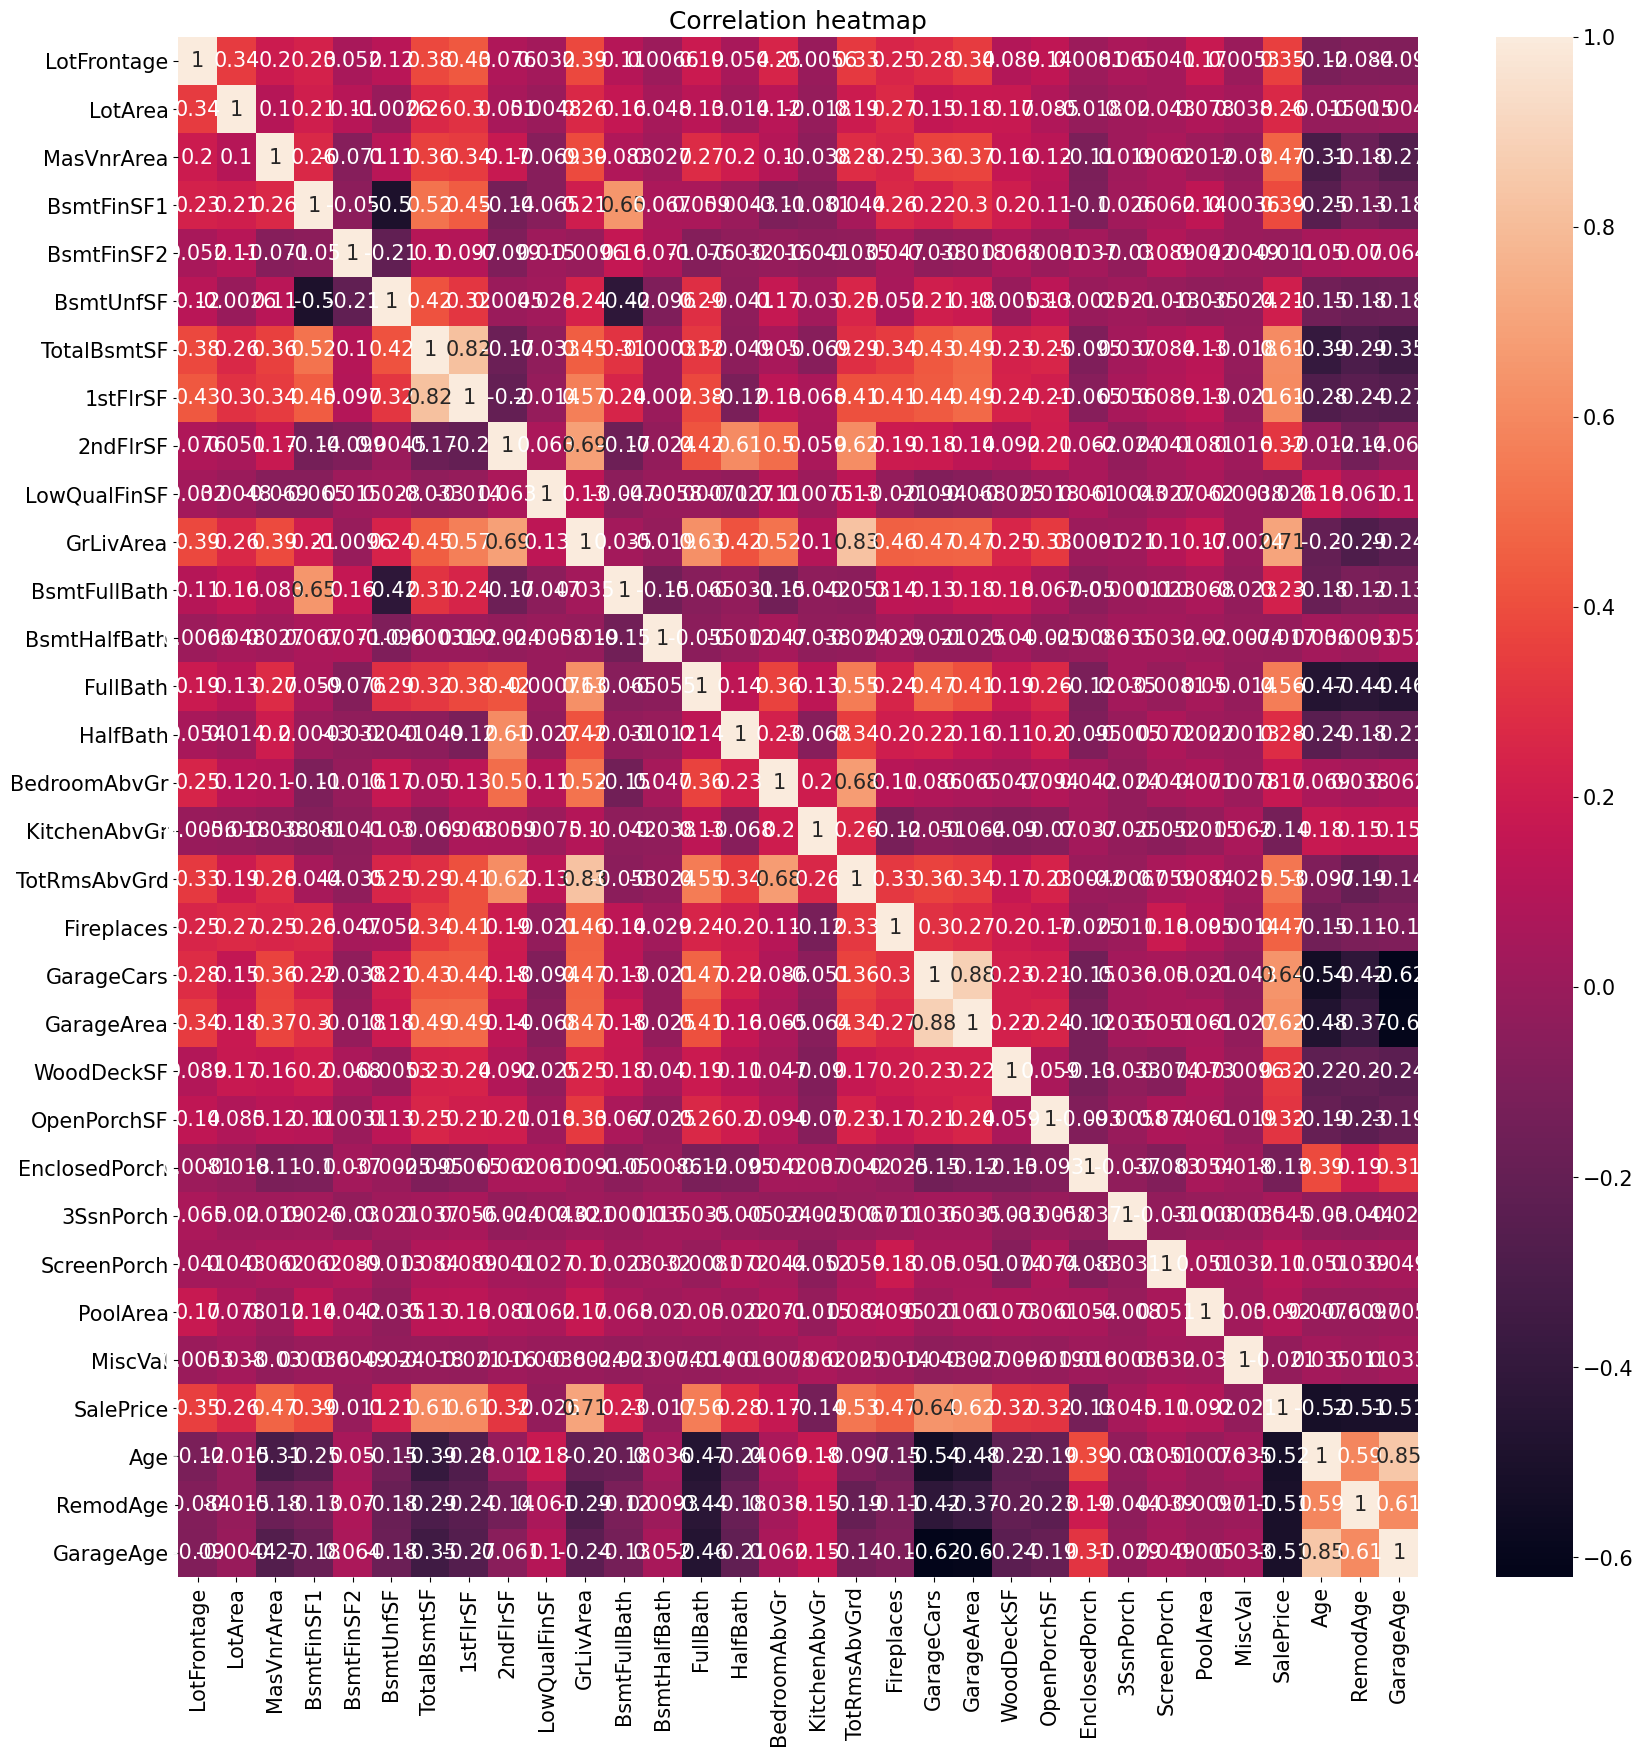

In [25]:
plt.figure(figsize=(20,20))
plt.title("Correlation heatmap")
sns.heatmap(data.corr(),annot=True)
plt.show()

We could see some of the variables are highly correlated such as 'GarageCars' and 'GarageArea', 'Age' and 'GarageAge', etc., Let us not drop these columns for now and check how our Linear regression algorithm performs on the data.

Now, let us check how the different categorical variables have an impact on the sales price.
Before that, let us write a function to create plots for different categorical variables.

In [26]:
def plot_barplot(data, var):
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=var, y="SalePrice", data= data)
    ax.bar_label(ax.containers[0])
    plt.title(f"Sales Price based on {var}")
    plt.xticks(rotation=90)

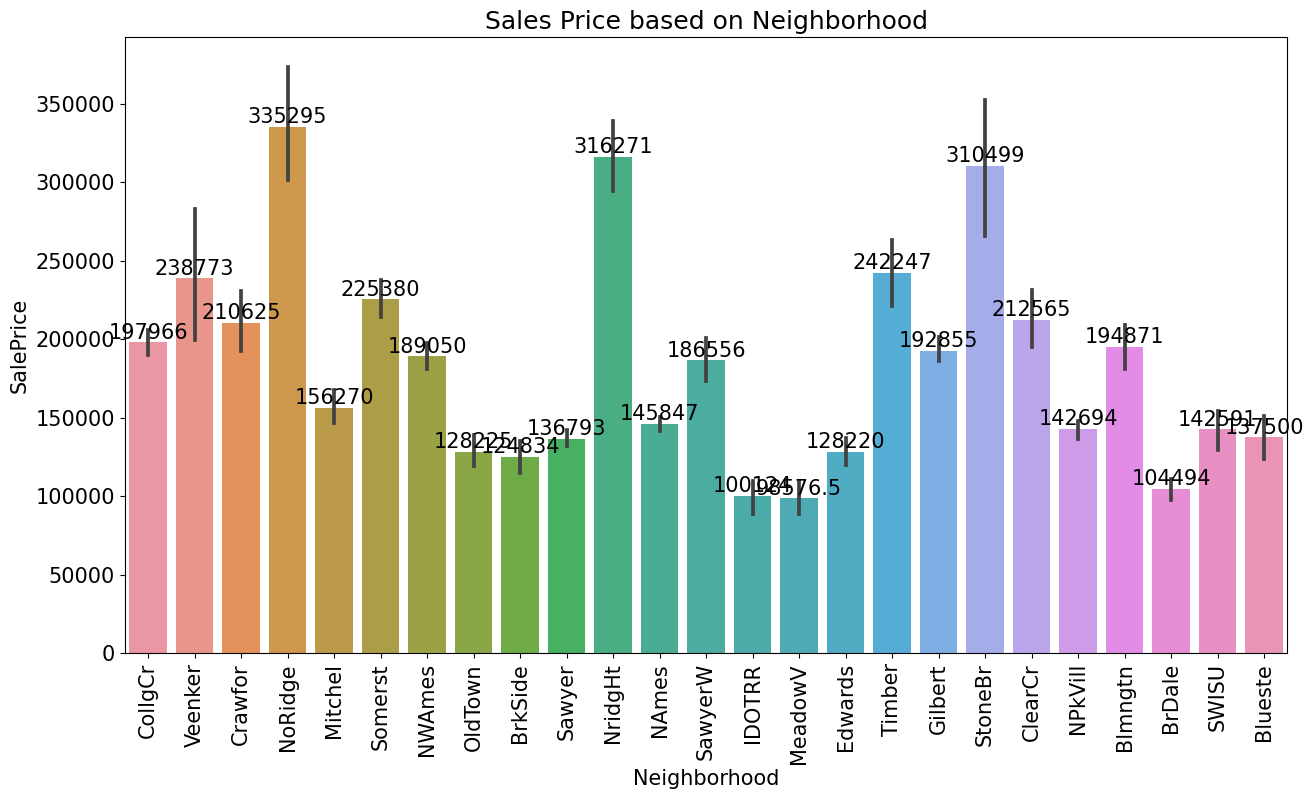

In [27]:
plot_barplot(data,'Neighborhood')

The plot shows the mean Sale Prices in each of neighbourhood. There is a disparity in the house prices between neighbourhoods as observed in the above plot.

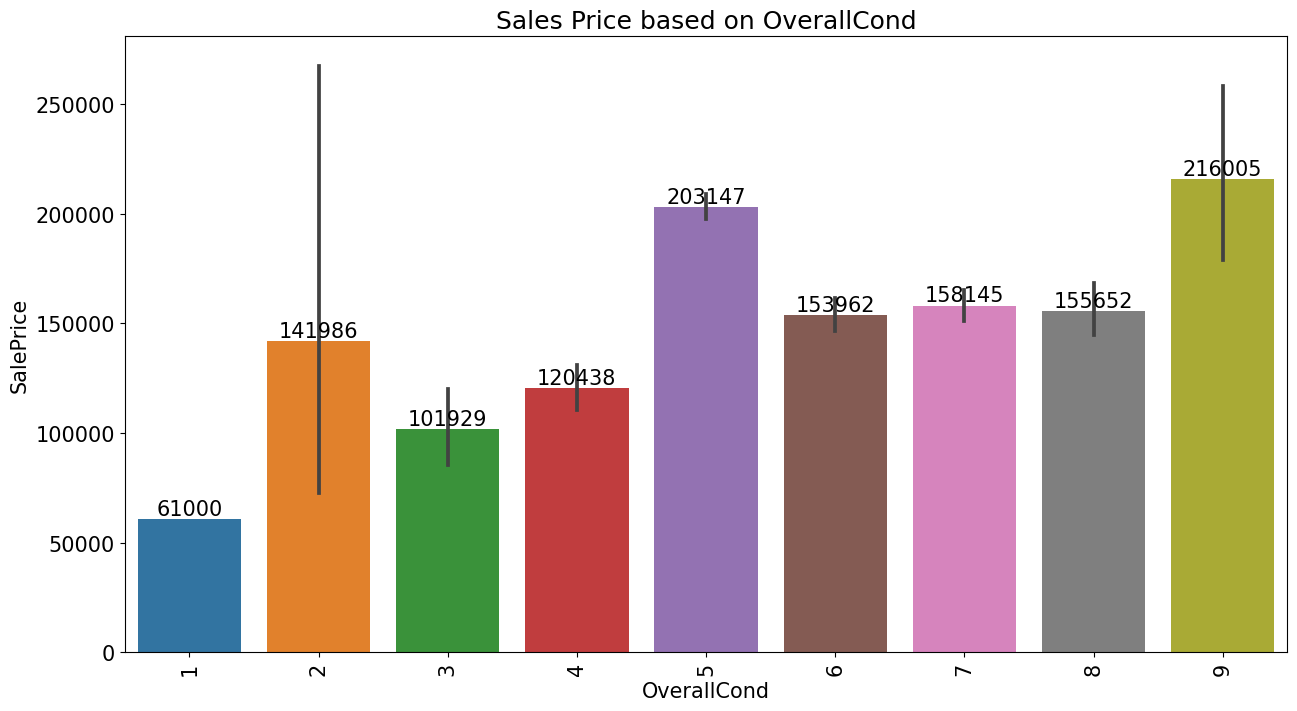

In [28]:
plot_barplot(data,'OverallCond')

The above plot depicts the mean sale prices of houses based on their overall condition's rating. Contrary to the intuition, the prices of houses with rating 2 have higher prices that rating 3 and 4. Again, the mean prices are higher for houses rated 5 compared to the ones rated 6, 7 and 8.

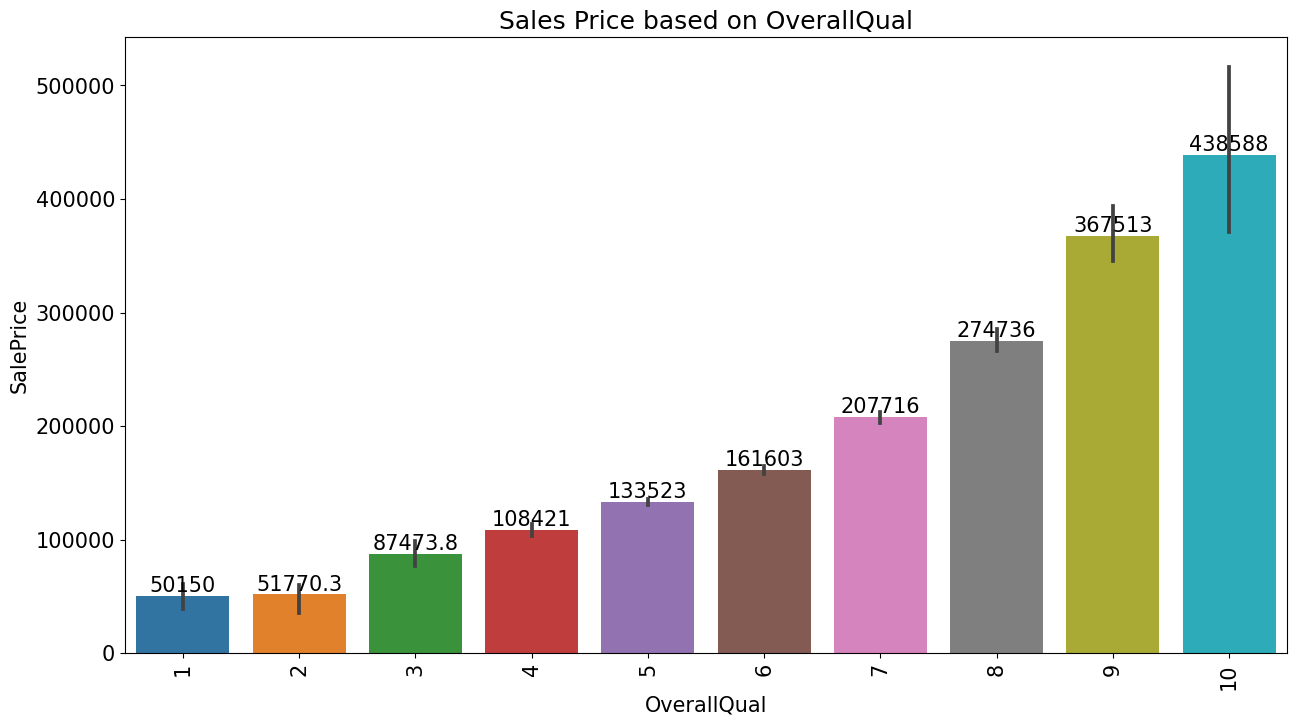

In [29]:
plot_barplot(data,'OverallQual')

The plot above shows the average prices of houses based on the Overall Quality ratings. The plot shows an increasing trend in prices when the house is rated on a higher scale.

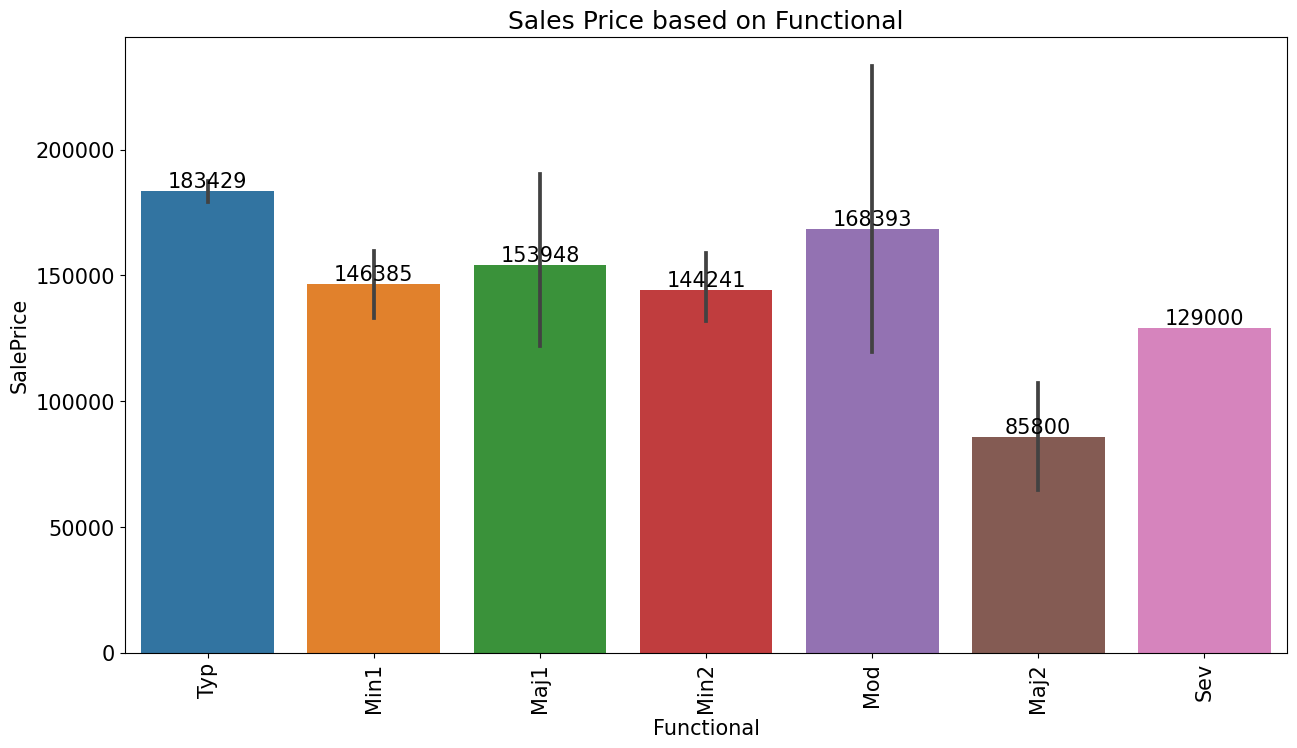

In [30]:
plot_barplot(data,'Functional')

This plot shows the Sales price based on the house's functionality. As per intuition, the houses which are severely damaged have lower sales prices. And, a typical house have higher prices. This follows a trend.

Let us now check the impact of Sales prices based on different numerical variables. Before that, let us write a function for creating Scatter plot with regression line.

In [31]:
def plot_regplot(data, var):
    plt.figure(figsize=(15,8))
    sns.regplot(data[var], data['SalePrice'])
    plt.title(f'Relationship between {var} vs. SalesPrice')
    plt.xlabel(var)
    plt.ylabel('Sales Price')
    plt.show()

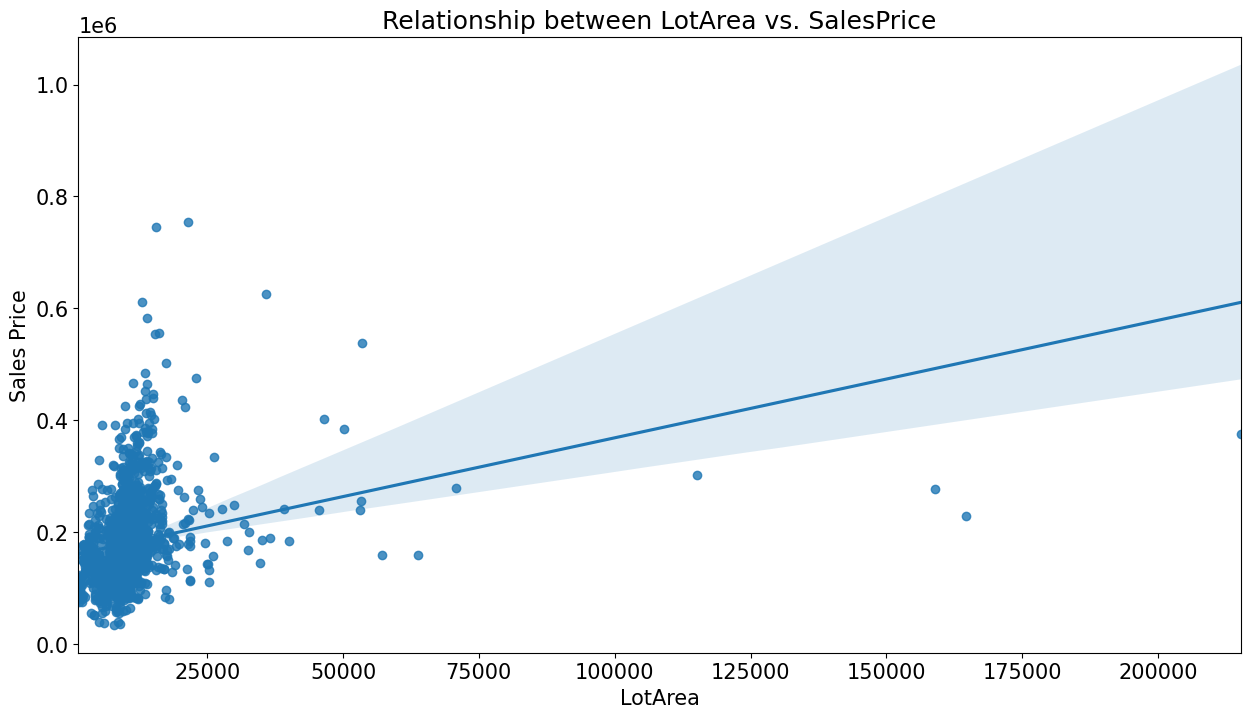

In [32]:
plot_regplot(data, 'LotArea')

The above plot shows the scatterplot with regression line for Lot Size of the House vs. Sales Price. We could see there are outliers in this. Let us remove the outliers only for visualization purposes and check how the plot looks like.

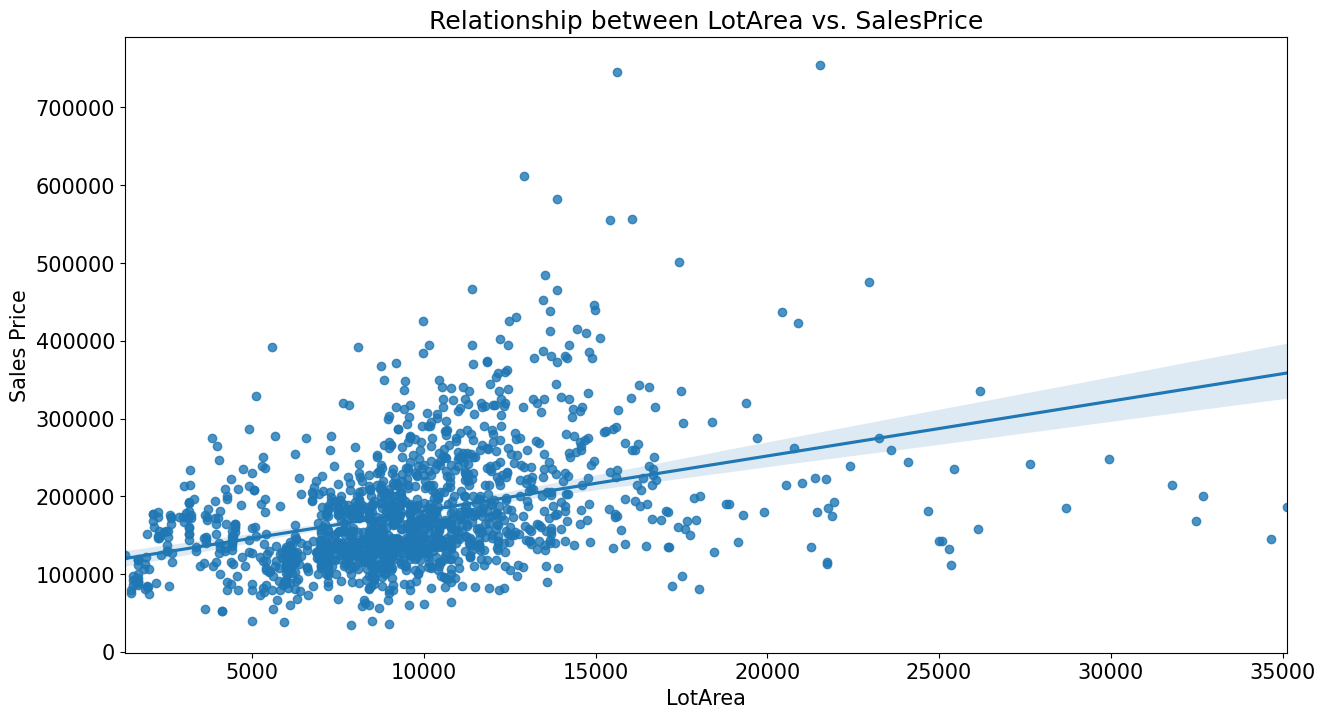

In [33]:
LotArea_data = data[(np.abs(stats.zscore(data['LotArea'])) < 2.5)]
plot_regplot(LotArea_data, 'LotArea')

From the above plot, we could see there is a small positive collinearity between the lot area and the sale price of the house.

Now, let us check the impact of Age (in years) of the house with sale price.

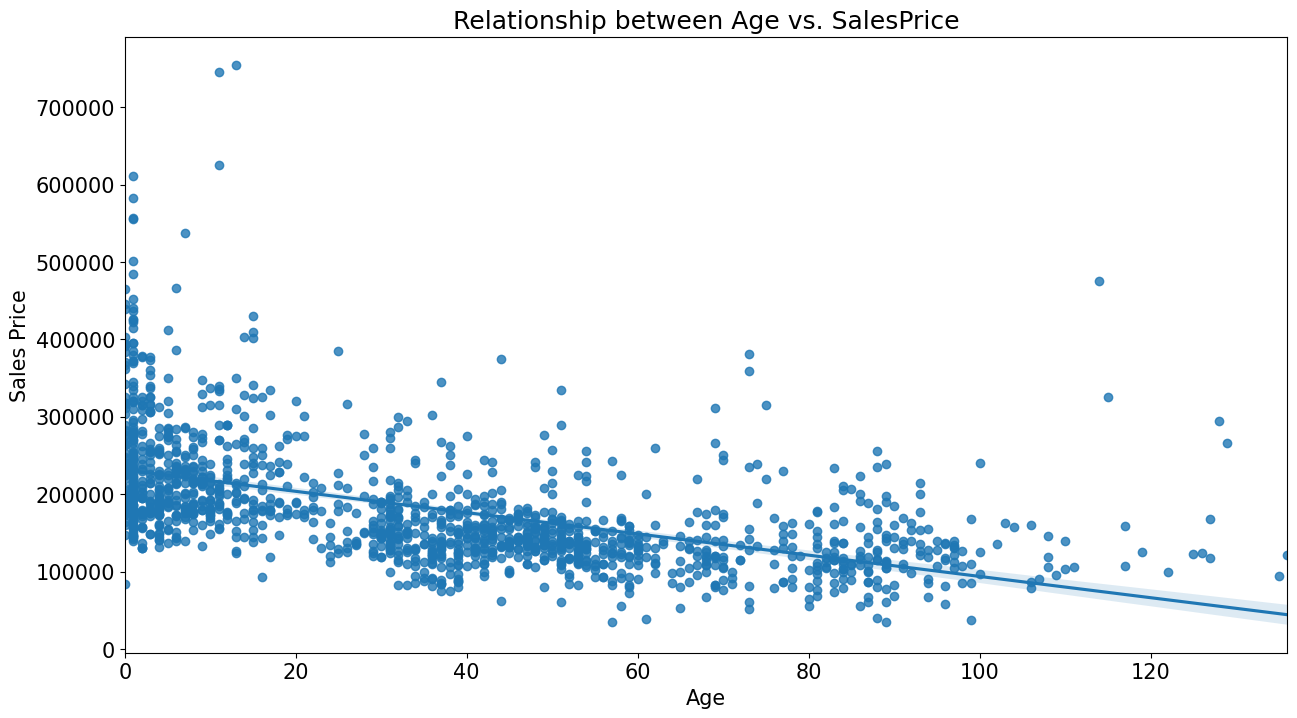

In [34]:
plot_regplot(data, 'Age')

We could see a negative correlation between the Age and the house of the price. Except for few outliers, the new houses usually cost higher than the old ones.

## Dummy Variable Creation

Let us now create the dummy variables for the categorical variables. 

For the variables where we had earlier imputed null data with "None", let us drop the "None" column and not use `drop_first`. 

Let us create a function to create dummies.

In [35]:
def create_dummies(data, var, remove_none=False):
    if remove_none:
        dummy_data = pd.get_dummies(data[var]).drop('None', axis=1)
    else:
        dummy_data = pd.get_dummies(data[var], drop_first=True)
    
    #renaming columns in the format <var_columnname>
    dummy_data.columns = [f'{var}_{col}' for col in dummy_data.columns]
    
    # Concatenating dummy data to original data
    data = pd.concat([data, dummy_data], axis=1)
    
    # Dropping original variable
    data.drop([var], axis=1, inplace=True)
    return data

Getting categorical columns and numerical columns

In [36]:
cat_cols = list(data.select_dtypes(['object']).columns)
num_cols = list(set(data.columns) - set(cat_cols))

Now filter all the categorical columns that have "None" as one of its categories. Also, create another list of column names which does not have "None" in it.

In [37]:
cat_cols_with_none = []
cat_cols_wo_none = []
for col in cat_cols:
    if any(data[col].astype('str').str.contains('None')):
        cat_cols_with_none.append(col)
    else:
        cat_cols_wo_none.append(col)
        
print("Categorical columns with None:\n", cat_cols_with_none)
print("\nCategorical columns without None:\n", cat_cols_wo_none)

Categorical columns with None:
 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

Categorical columns without None:
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']


Now, create dummy variables for the categorical columns. Like mentioned before, if the column has a None, we will drop that dummy column instead of using `drop_first`.

In [38]:
for col in cat_cols:
    if col in  cat_cols_with_none:
        data = create_dummies(data, col, True)
    else:
        data = create_dummies(data, col)

In [39]:
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,RemodAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,Garag

In [40]:
data.shape

(1460, 297)

With the dummy variables created, we now have around 296 variables in the dataset.

# Model Building and Evaluation



## Train - Test Split

Let us now create the train and test data.

In [41]:
train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=1)

## Scaling data

We saw the data had outliers in some of the columns. Let us now apply StandardScaler to the numerical columns to make every column scaled similarly.

In [42]:
scaler = StandardScaler()

train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [43]:
# Predictor data with all independent variables
X_train = train_data.drop(['SalePrice'], axis=1)
X_test = test_data.drop(['SalePrice'], axis=1)

# Target data
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

In [44]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1021, 296)
X_test shape (438, 296)
y_train shape (1021,)
y_test shape (438,)


The shapes of the data look good.

## Building Model

Let us now check how the linear regression model works. Creating linear regression model.

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Printing the coefficients and intercept.

In [46]:
print(lm.intercept_)
print(lm.coef_)

-4659025692.774014
[-2.84147530e-04  1.03938081e-01  3.63419484e-02  2.22615825e+11
  7.92569500e+10  2.10790484e+11 -2.15455157e+11 -1.70033324e+11
 -1.88539184e+11 -2.08267880e+10  2.29441506e+11 -8.07215226e-04
  1.54968422e-02  3.69912104e-02  2.55476485e-02 -5.60582811e-04
 -2.45445333e-02  4.18197576e-03  6.37958846e-02  5.65382120e-03
  1.03202795e-01  1.40953982e-02  7.05483811e-03  1.49868624e-02
  1.34502744e-02  2.71084740e-02  1.34917383e-01  3.53320499e-02
 -1.06759118e-01 -2.19543744e-02  4.16170877e-02 -9.32657734e-03
  1.72904898e-02  1.37153625e-01 -1.04511261e-01 -1.59454346e-03
  2.72655487e-02  1.28204346e-01 -2.97523499e-01 -1.07177734e-01
 -4.62216243e+09 -5.50458144e+09 -5.50458144e+09 -5.50458144e+09
 -8.61658059e+09  4.57969666e-01  5.13027668e-01  4.23031807e-01
  4.29855347e-01 -1.65840149e-01  7.39605427e-02  9.36737061e-02
  7.29446411e-02  1.77734375e-01  1.51977539e-02  1.69036865e-01
 -1.17843628e-01  1.52546406e-01 -1.00831032e+00  7.83996582e-02
 -5.87

Now, let us check the model metrics

In [47]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Training data R2 Score:", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data R2 Score:", r2_test_lr)

Training data R2 Score: 0.9371717322650451
Test data R2 Score: -3.232142863822262e+17


We could see that the Test data's R2 score is in negative and is a large value. Contrarily, the training data has really good R2 score. This shows overfitting of the model.

Let us experiment with different Ridge and lasso methods to introduce regularization in the model and as well as simplify the model.

### Ridge Regression

Applying Ridge regression with a range of alpha values for regularization.

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
20
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, get the best alpha value.

In [49]:
print("Best alpha value for Ridge Regression is:", model_cv.best_params_['alpha'])

Best alpha value for Ridge Regression is: 20


Now, fixing alpha value to 20 and creating the ridge regression model.

In [50]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [51]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Training data R2 Score:", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data R2 Score:", r2_test_lr)

Training data R2 Score: 0.8843890313857328
Test data R2 Score: 0.8656633086011082


Though the training data's R2 score has reduced compared to regular linear regression, the test R2 score has improved a lot.

Now, let us try Lasso regression and check if we get better model metrics.

### Lasso Regression

Applying Lasso Regression with different alphas similar to what was done with Ridge Regression.

In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now, get the best alpha value.

In [53]:
print("Best alpha value for Lasso Regression is:", model_cv.best_params_['alpha'])

Best alpha value for Lasso Regression is: 0.001


Now, fixing alpha value to 0.001 and creating the lasso regression model.

In [54]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

Printing the coefficients of lasso regression model with alpha 0.001.

In [55]:
lasso.coef_

array([-6.08025071e-02,  6.91064069e-02,  3.21791492e-02,  0.00000000e+00,
        2.39269356e-02, -1.18635255e-02,  0.00000000e+00,  0.00000000e+00,
        3.01150864e-02, -1.50938160e-02,  2.55983695e-01,  3.00605989e-02,
        6.74384853e-03,  6.29395647e-02,  1.58483073e-02, -8.39478611e-03,
       -7.05818347e-02,  6.96647237e-02,  5.42214185e-02,  1.29835986e-01,
       -0.00000000e+00,  2.58011410e-02,  1.05887607e-02,  1.91198318e-02,
        1.21637473e-02,  3.18710796e-02, -1.03663279e-02,  0.00000000e+00,
       -7.45407127e-02, -3.39419186e-02,  1.82285965e-02, -4.74111876e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.83564640e-02,
        0.00000000e+00,  0.00000000e+00,  2.93370325e-02, -0.00000000e+00,
       -7.40192026e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.62566939e-02,  0.00000000e+00,  0.00000000e+00,
       -4.86512397e-02,  0.00000000e+00, -5.46041254e-03,  3.50165409e-02,
        8.29458279e-02, -

Since the lasso regression also does feature selection, let us see how many variables that lasso regression found as significant for this model.

In [56]:
print("Number of variables chosen by lasso regression: ", sum(lasso.coef_ > 0))

Number of variables chosen by lasso regression:  81


Computing model metrics

In [57]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Training data R2 Score:", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data R2 Score:", r2_test_lr)

Training data R2 Score: 0.9031621507070995
Test data R2 Score: 0.8797567642115705


We could see a slightly higher R2 score for the test dataset when compared to the ridge regression model.

### Residual Analysis check of Lasso Model for checking linear regression's assumptions

Check if error terms are normally distributed with mean 0.

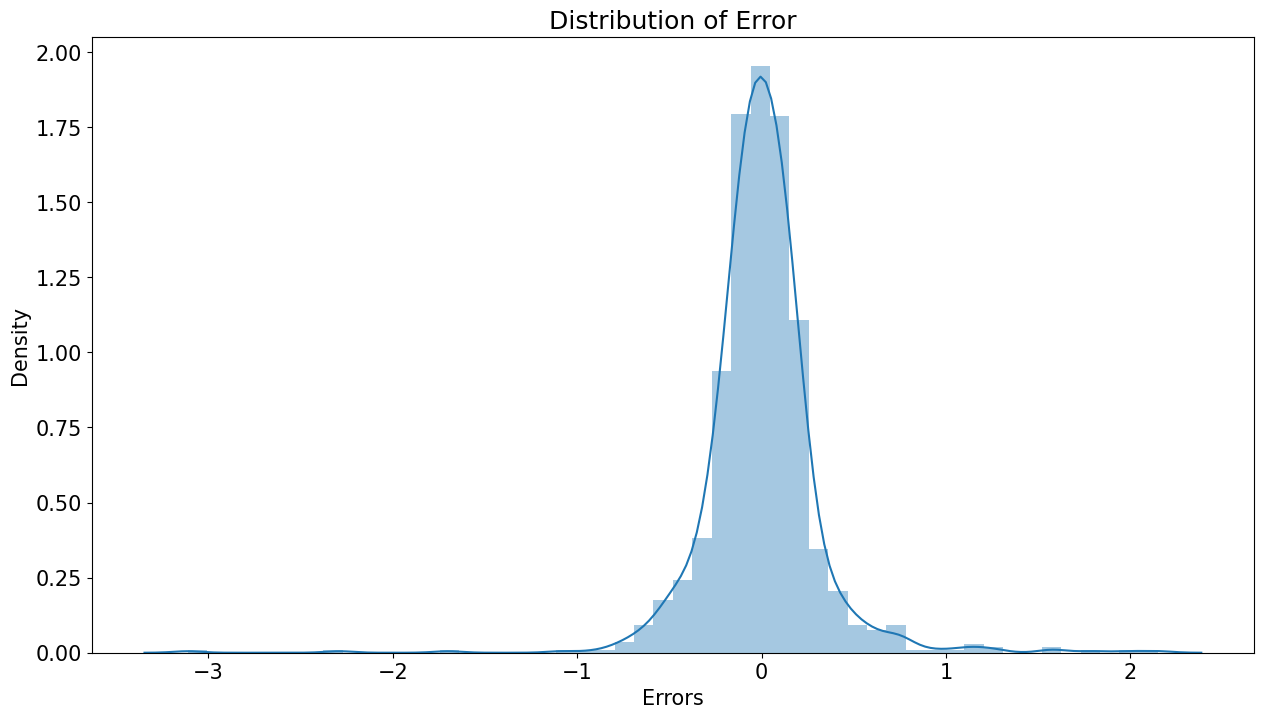

In [58]:
plt.figure(figsize=(15,8))
residual = y_train - y_pred_train

sns.distplot(residual)
plt.title('Distribution of Error')
plt.xlabel('Errors')
plt.show()

The error terms are normally distributed as seen in the plot above and has a mean of 0.

Check if error terms are independent by looking for patterns in the residuals.

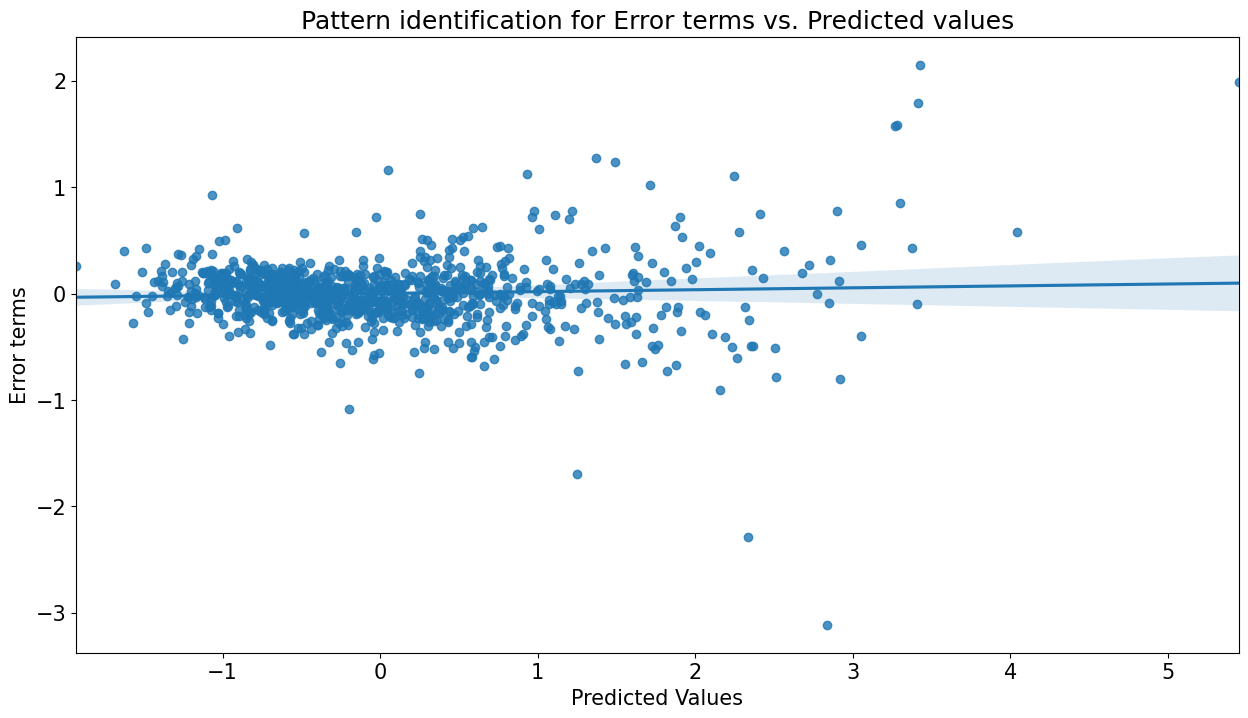

In [59]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_pred_train, y=residual)
plt.title('Pattern identification for Error terms vs. Predicted values')
plt.xlabel('Predicted Values')
plt.ylabel('Error terms')
plt.show()

In [60]:
print("Pearson correlation coefficient:",residual.corr(pd.Series(y_pred_train)))

Pearson correlation coefficient: -0.08033651926263202


We do not see any noticeable pattern from the above graph. Also, the Pearson coefficient is very small (i.e. absolute value less than 0.1), meaning almost no linear relationship between the error terms and predicted values. This satisfies another assumption of linear regression which says there should not be any noticeable pattern in the error terms.

# Inference

* Ridge Regression model performs best with an alpha (lambda) value of 20. Ridge regression model has a test r2 score of 86.56%.
* Lasso Regression model performs best with an alpha (lambda) value of 0.001. Lasso regression model has a test r2 score of 87.97%.
* We could see that the test R2 score is highest with the lasso regression model. Also, this model is better than the ridge regression model because the lasso model reduces the number of features making the model simpler by retaining only the significant features.


In [61]:
lasso_coeff = list(lasso.coef_)
lasso_coeff.insert(0, lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coeff = pd.DataFrame(list(zip(cols, lasso_coeff)))
lasso_coeff.columns = ['Feature','Coeff']

# getting top positive coefficients
lasso_coeff.sort_values(by='Coeff',ascending=False, key=abs).head(15)

,Feature,Coeff
101,Condition2_RRAe,-1.294487
144,Exterior1st_AsphShn,1.223941
87,Neighborhood_Timber,0.677080
124,OverallCond_2,0.608026
123,OverallQual_10,0.595575
264,Fence_GdPrv,-0.421801
81,Neighborhood_OldTown,0.421554
0,LotFrontage,-0.415712
80,Neighborhood_NridgHt,0.395862
108,HouseStyle_1.5Unf,-0.324247


The Most significant variables that have a positive effect on the price of the house are:
* Exterior1st - Exterior covering on house
* Neighborhood - Physical locations within Ames city limits
* OverallCond - Rates the overall condition of the house
* OverallQual - Rates the overall material and finish of the house
* BsmtExposure - Refers to walkout or garden level walls
* BsmtFullBath - Basement full bathrooms

The Most significant variables that have a negative effect on the price of the house are:
* Condition2 - Proximity to various conditions
* Fence - Fence quality
* LotFrontage - Linear feet of street connected to property
* HouseStyle - Style of dwelling
* BldgType - Type of dwelling

When the price of the property is lesser than the predicted price from the model, the housing company can buy the property.